# Conflicts time series dataset released by ACLED

Link to the Conflicts data released by ACLED: https://acleddata.com/data-export-tool/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# Set a value for the column width layout.
pd.options.display.max_colwidth = 20
plt.style.use("default")

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from MapPlot.MapPlot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Read the data released by ACLED regarding the conflicts indicator.
COUNTRIES = ["Yemen", "Burkina Faso", "Nigeria", "Mali", "Syria", "Cameroon"]

path = "./ACLED_data/"
dfs = []

for country in COUNTRIES:
    df = pd.read_csv(f"{path}/{country}.csv")
    df["Country"] = country
    dfs.append(df)

df = pd.concat(dfs, axis = 0, ignore_index = True)
# Delete duplicate rows if exist.
df = df.drop_duplicates()
df.head()

,id,year,month,day,admin1_code,admin2_code,event,interaction,fatalities,latitude,longitude,iso3,active_adm_id,Country
0,119082,2021,10,10,3407,NaN,Battles,13,0,13.8874,45.7740,YEM,1,Yemen
1,122931,2021,9,30,3407,NaN,Battles,13,0,13.8874,45.7740,YEM,1,Yemen
2,123026,2021,9,29,3407,NaN,Battles,13,0,13.8874,45.7740,YEM,1,Yemen
3,123031,2021,9,29,3407,NaN,Battles,13,0,13.8828,45.8686,YEM,1,Yemen
4,124058,2021,9,27,3407,NaN,Riots,50,0,13.1287,45.3807,YEM,1,Yemen


### Brief items description

- *id*: an individual data numeric	identifier.
- *iso3*: the country in which the event took place. 
- *year*: the year in which	an event took place.
- *month*: the month in which an event took place.
- *day*: the day in which an event took place.
- *event*: the	type of	event.
- *interaction*: a numeric code	indicating the interaction between types of	actor1 and actor2.
- *region*: the	region of the world	where the event	took place.
- *Country*: the country in	which the event	took place.
- *admin1_code*: the code of the largest sub-national administrative region in which the event took place.
- *admin2_code*: the code of the second largest sub-national administrative region in which the event took place.
- *latitude*: the latitude of the location.
- *longitude*: the longitude of	the	location.
- *fatalities*: the	number of reported fatalities which	occurred during	the	event.

ACLED currently	codes six types	of events, both	violent	and	non-violent, that may occur during a conflict. These include:
- *Battles*: violent interactions between two organised armed groups;
- *Explosions/Remote violence*: one-sided violence events in which the tool for	engaging in	conflict creates asymmetry by taking away the ability of the target	to respond;
- *Violence against civilians*: violent	events where an	organised armed	group deliberately inflicts	violence upon unarmed non-combatants;
- *Protests*: a public demonstration against a political entity, government	institution, policy	or group in	which the participants are not violent;
- *Riots*: violent events where	demonstrators or mobs engage in	disruptive acts	or disorganised	acts of	violence against property or people;
- *Strategic development*: accounts	for often non-violent activity by conflict and other agents	within the context of the war/dispute. Recruitment,	looting	and	arrests	are	included.

N.B. ACLED does not independently verify details of fatalities, and includes this information as an estimate only, reflecting the content of media reports.

In [5]:
# Check if the dataframe contains some NaN values.
df.isna().sum()

id                   0
year                 0
month                0
day                  0
admin1_code          0
admin2_code      52533
event                0
interaction          0
fatalities           0
latitude             0
longitude            0
iso3                 0
active_adm_id        0
Country              0
dtype: int64

In [6]:
# Check index identifier of the dataframe.
df.set_index("id").index.is_unique

False

In [7]:
df["active_adm_id"].unique()

array([1], dtype=int64)

In [8]:
not_unique = df.set_index(["Country", "year", "month", "day", "event", "latitude", "longitude", "admin1_code", "admin2_code", "interaction"]).sort_index()

mask = not_unique.index.value_counts() > 1
mask = mask[mask].index

not_unique.loc[mask]

id  \
Country year month day event                latitude longitude admin1_code admin2_code interaction            
Syria   2019 1     9   Battles              35.1337  36.7613   900225      0.0         22           1891594   
                                                                                       22           1891597   
                                                                                       22           1891599   
                                                                                       22           1891602   
                                                                                       22           1891613   
...                                                                                                     ...   
             4     25  Explosions/Remote... 35.5170  36.4025   900225      0.0         10           1869812   
        2018 2     8   Battles              35.3788  37.2488   900225      0.0         12           1947941   
                                                                                       12           1947990   
             5     13  Explosions/Remote... 35.8611  36.8061   900227      0.0         37           1928576   
                                                                                       37           1928580   

                                                                                                    fatalities  \
Country year month day event                latitude longitude admin1_code admin2_code interaction               
Syria   2019 1     9   Battles              35.1337  36.7613   900225      0.0         22                    0   
                                                                                       22                    0   
                                                                                       22                    0   
                                                                                       22                    0   
                                                                                       22                    0   
...                                                                                                        ...   
             4     25  Explosions/Remote... 35.5170  36.4025   900225      0.0         10                    0   
        2018 2     8   Battles              35.3788  37.2488   900225      0.0         12                    0   
                                                                                       12                    0   
             5     13  Explosions/Remote... 35.8611  36.8061   900227      0.0         37                    0   
                                                                                       37                    0   

                                                                                                   iso3  \
Country year month day event                latitude longitude admin1_code admin2_code interaction        
Syria   2019 1     9   Battles              35.1337  36.7613   900225      0.0         22           SYR   
                                                                                       22           SYR   
                                                                                       22           SYR   
                                                                                       22           SYR   
                                                                                       22           SYR   
...                                                                                                 ...   
             4     25  Explosions/Remote... 35.5170  36.4025   900225      0.0         10           SYR   
        2018 2     8   Battles              35.3788  37.2488   900225      0.0         12           SYR   
                                                                                       12           SYR   
 

In [9]:
# Keep only some features/items and raname them.
df = df[["Country", "year", "month", "day", "event", "admin1_code", "fatalities"]]
df.rename(columns = {"year": "Year", "month": "Month", "day": "Day", "event": "Event type", "fatalities": "Fatalities"}, inplace = True)
df.head()

,Country,Year,Month,Day,Event type,admin1_code,Fatalities
0,Yemen,2021,10,10,Battles,3407,0
1,Yemen,2021,9,30,Battles,3407,0
2,Yemen,2021,9,29,Battles,3407,0
3,Yemen,2021,9,29,Battles,3407,0
4,Yemen,2021,9,27,Riots,3407,0


### Country item

In [10]:
print("The countries are:", ", ".join(df["Country"].unique()))

The countries are: Yemen, Burkina Faso, Nigeria, Mali, Syria, Cameroon


### AdminStrata item

In [11]:
# Yemen.
mapping = {3411: "Al Hudaydah", 3412: "Al Jawf", 3413: "Al Maharah", 3414: "Al Mahwit", 144969: "Amanat Al Asimah", 
           3415: "Amran", 3416: "Dhamar", 900100: "Hadramaut", 3418: "Hajjah", 3419: "Ibb", 3420: "Lahj", 3421: "Marib", 
           144971: "Raymah", 3422: "Sa'ada", 3423: "Sana'a", 900101: "Socotra", 3424: "Shabwah", 3425: "Taizz", 3407: "Abyan", 
           3409: "Aden", 3410: "Al Bayda", 3408: "Al Dhale'e"}

df.loc[df["Country"] == "Yemen", "AdminStrata"] = df["admin1_code"].map(mapping)

In [12]:
# Syria.
mapping = {900230: "Rural Damascus", 900223: "Dar'a", 900218: "Al-Hasakeh", 900231: "Tartous", 900225: "Hama", 
           900219: "Aleppo", 900226: "Homs", 900221: "As-Sweida", 900228: "Lattakia", 900222: "Damascus", 
           900224: "Deir-ez-Zor", 900220: "Ar-Raqqa", 900229: "Quneitra", 900227: "Idleb"}

df.loc[df["Country"] == "Syria", "AdminStrata"] = df["admin1_code"].map(mapping)

In [13]:
# Burkina Faso
mapping = {900714: "Centre", 900718: "Centre-Sud", 900722: "Plateau-Central", 900715: "Centre-Est", 900719: "Est", 
           900723: "Sahel", 900712: "Boucle-Du-Mouhoun", 900716: "Centre-Nord", 900720: "Hauts-Bassins", 
           900724: "Sud-Ouest", 900713: "Cascades", 900717: "Centre-Ouest", 900721: "Nord"}

df.loc[df["Country"] == "Burkina Faso", "AdminStrata"] = df["admin1_code"].map(mapping)

In [14]:
# Mali
mapping = {1931: "Mopti", 1932: "Segou", 1934: "Tombouctou-Taoudeni", 1926: "Bamako", 1928: "Kayes", 1930: "Koulikoro", 
           1933: "Sikasso", 1927: "Gao-Menaka", 1929: "Kidal"}

df.loc[df["Country"] == "Mali", "AdminStrata"] = df["admin1_code"].map(mapping)

In [15]:
# Cameroon
mapping = {900968: "South-West", 900959: "Adamawa", 900960: "Central", 900961: "East", 900962: "Far-North", 900963: "Littoral", 
           900964: "North", 900967: "South", 900966: "West", 900965: "North-West"}

df.loc[df["Country"] == "Cameroon", "AdminStrata"] = df["admin1_code"].map(mapping)

In [16]:
# Nigeria
mapping = {2211: "Adamawa", 2216: "Borno", 2240: "Yobe"}

df.loc[df["Country"] == "Nigeria", "AdminStrata"] = df["admin1_code"].map(mapping)

In [17]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen (YEM)**: the administrative regions of Yemen are 22, including the capital Sana'a (Amanat Al Asimah) and Socotra archipelago. The Conflicts dataframe has the values of all the administrative regions.

In [18]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', "Al Dhale'e", 'Aden', 'Al Bayda', 'Al Hudaydah',
       'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amran', 'Dhamar', 'Hajjah',
       'Ibb', 'Lahj', 'Marib', "Sa'ada", "Sana'a", 'Shabwah', 'Taizz',
       'Amanat Al Asimah', 'Raymah', 'Hadramaut', 'Socotra'], dtype=object)

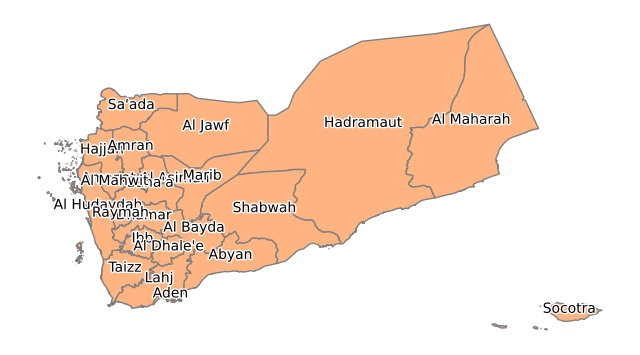

In [19]:
# Plot map.
draw_adminstratas(country = "Yemen", adminstratas_to_highlight = AdminStratas["Yemen"], figsize = (8, 5), annotation = True, 
                  path_to_save = PATH_TO_SAVE_DATA + "Yemen/map_conflict.png", dpi = 300)

- **Burkina Faso (BFA)**: Burkina Faso is divided into 13 administrative regions. The conflict dataframe has the values of all 13 administrative regions.

In [20]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Boucle-Du-Mouhoun', 'Cascades', 'Centre', 'Centre-Est',
       'Centre-Nord', 'Centre-Ouest', 'Centre-Sud', 'Est',
       'Hauts-Bassins', 'Nord', 'Plateau-Central', 'Sahel', 'Sud-Ouest'],
      dtype=object)

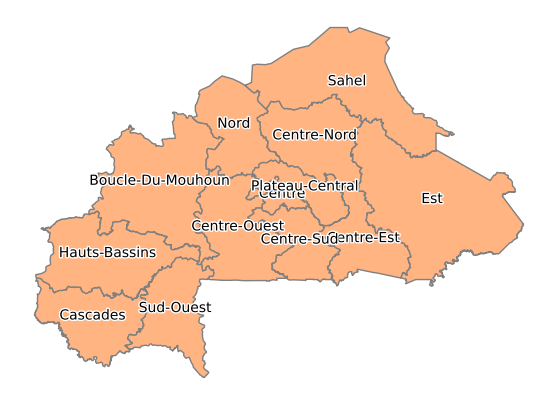

In [21]:
# Plot map.
draw_adminstratas(country = "Burkina Faso", adminstratas_to_highlight = AdminStratas["Burkina Faso"], figsize = (8, 5), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Burkina Faso/map_conflict.png", dpi = 300)

- **Cameroon (CMR)**: the administrative regions of Cameroon are 10. The conflict dataframe has the values of all the 10 administrative regions.

In [22]:
print(AdminStratas["Cameroon"].shape)
AdminStratas["Cameroon"]

(10,)


array(['Adamawa', 'Central', 'East', 'Far-North', 'Littoral', 'North',
       'North-West', 'West', 'South', 'South-West'], dtype=object)

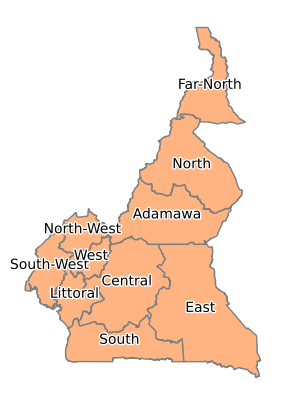

In [23]:
# Plot map.
draw_adminstratas(country = "Cameroon", adminstratas_to_highlight = AdminStratas["Cameroon"], figsize = (8, 5), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Cameroon/map_conflict.png", dpi = 300)

- **Mali (MLI)**: Mali is divided into eight regions and one capital district (Bamako). The AdminStrata items of the conflict dataframe cover all 9 regions.

N.B. The region 'Gao-Menaka' is considered as two different regions.

In [24]:
print(AdminStratas["Mali"].shape)
AdminStratas["Mali"]

(9,)


array(['Koulikoro', 'Sikasso', 'Mopti', 'Segou', 'Tombouctou-Taoudeni',
       'Kidal', 'Bamako', 'Gao-Menaka', 'Kayes'], dtype=object)

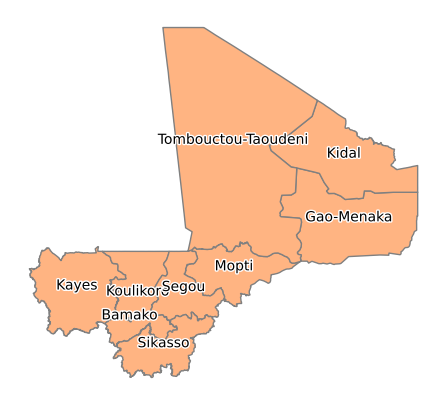

In [25]:
# Plot map.
draw_adminstratas(country = "Mali", adminstratas_to_highlight = AdminStratas["Mali"], figsize = (8, 5), annotation = True, 
                  path_to_save = PATH_TO_SAVE_DATA + "Mali/map_conflict.png", dpi = 300)

- **Nigeria (NGA)**: Nigeria is divided into 36 administrative regions. It also includes The Federal Capital Territory that is under the direct control of the federal government. The conflict dataframe has the values of all 37 administrative regions.

In [26]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(3,)


array(['Adamawa', 'Borno', 'Yobe'], dtype=object)

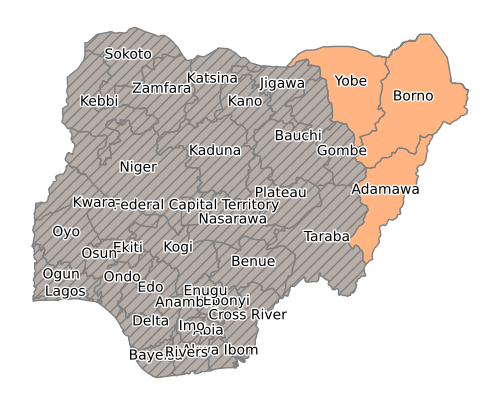

In [27]:
# Plot map.
draw_adminstratas(country = "Nigeria", adminstratas_to_highlight = AdminStratas["Nigeria"], figsize = (8, 5), 
                  annotation = True, annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Nigeria/map_conflict.png", 
                  dpi = 300)

- **Syria (SYR)**: the administrative regions of the Syria country are 14. The conflicts dataframe has the values of all 14 administrative regions.

In [28]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(14,)


array(['Al-Hasakeh', 'Aleppo', 'Ar-Raqqa', 'Idleb', 'Lattakia',
       'Quneitra', 'Rural Damascus', 'Tartous', 'As-Sweida', 'Damascus',
       "Dar'a", 'Deir-ez-Zor', 'Hama', 'Homs'], dtype=object)

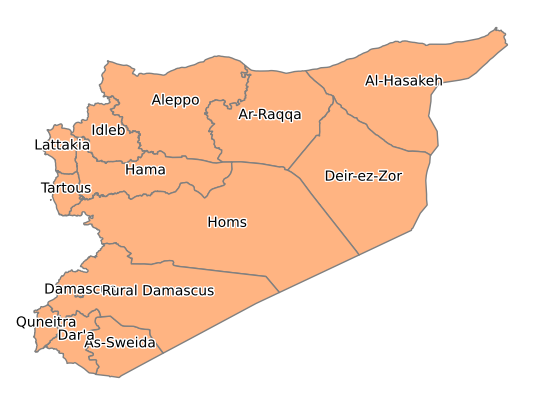

In [29]:
# Plot map.
draw_adminstratas(country = "Syria", adminstratas_to_highlight = AdminStratas["Syria"], figsize = (8, 5), annotation = True, 
                  path_to_save = PATH_TO_SAVE_DATA + "Syria/map_conflict.png", dpi = 300)

## Creation of the time series

We decide to focus on the number of fatalities to build our time series.

In [30]:
# Convert to an appropriate datetime format.
df["Datetime"] = pd.to_datetime(df[["Year", "Month", "Day"]])
df.drop(["Year", "Month", "Day", "admin1_code"], axis = 1, inplace = True)
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Country,Event type,Fatalities,AdminStrata,Datetime
0,Syria,Explosions/Remot...,0,Hama,2018-01-01
1,Syria,Explosions/Remot...,0,Deir-ez-Zor,2018-01-01
2,Syria,Violence against...,1,Deir-ez-Zor,2018-01-01
3,Syria,Explosions/Remot...,12,Deir-ez-Zor,2018-01-01
4,Syria,Explosions/Remot...,1,Deir-ez-Zor,2018-01-01


In [31]:
# Check if the dataframe contains some NaN values.
df.isnull().sum()

Country        0
Event type     0
Fatalities     0
AdminStrata    0
Datetime       0
dtype: int64

In [32]:
# Create appropriate time series subgroups with an appropriate datetime object resampled to day keeping sum fatalities if occurred in the same day of the same administrative region and subevent. 
df = df.groupby(["Country", "AdminStrata", "Event type"]).apply(lambda group: group.set_index("Datetime").resample("D").sum()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Event type,Datetime,Fatalities
0,Burkina Faso,Boucle-Du-Mouhoun,Battles,2018-01-01,0
1,Burkina Faso,Boucle-Du-Mouhoun,Battles,2018-01-02,0
2,Burkina Faso,Boucle-Du-Mouhoun,Battles,2018-01-03,0
3,Burkina Faso,Boucle-Du-Mouhoun,Battles,2018-01-04,0
4,Burkina Faso,Boucle-Du-Mouhoun,Battles,2018-01-05,0


In [33]:
# Create a dataframe with multi-index column in order to have a summary dataframe of the time series.
df = df.set_index(["Datetime", "Country", "AdminStrata", "Event type"]).unstack(["Country", "AdminStrata", "Event type"])
df.columns = df.columns.droplevel(0)
freq = "D"
df.index.freq = freq
df.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun                                             
Event type            Battles Explosions/Remote violence Protests Riots   
Datetime                                                                  
2018-01-01                0.0                  NaN            NaN   NaN   
2018-01-02                0.0                  NaN            NaN   NaN   
2018-01-03                0.0                  NaN            NaN   NaN   
2018-01-04                0.0                  NaN            NaN   NaN   
2018-01-05                0.0                  NaN            NaN   NaN   

Country                                                                 \
AdminStrata                                                   Cascades   
Event type  Strategic developments Violence against civilians  Battles   
Datetime                                                                 
2018-01-01                   NaN                    NaN            NaN   
2018-01-02                   NaN                    NaN            NaN   
2018-01-03                   NaN                    NaN            NaN   
2018-01-04                   NaN                    NaN            NaN   
2018-01-05                   NaN                    NaN            NaN   

Country                                                ...    Yemen        \
AdminStrata                                            ...  Socotra         
Event type  Explosions/Remote violence Protests Riots  ... Protests Riots   
Datetime                                               ...                  
2018-01-01                   NaN            NaN   NaN  ...      NaN   NaN   
2018-01-02                   NaN            NaN   NaN  ...      NaN   NaN   
2018-01-03                   NaN            NaN   NaN  ...      NaN   NaN   
2018-01-04                   NaN            NaN   NaN  ...      NaN   NaN   
2018-01-05                   NaN            NaN   NaN  ...      NaN   NaN   

Country                                                                \
AdminStrata                                                     Taizz   
Event type  Strategic developments Violence against civilians Battles   
Datetime                                                                
2018-01-01                   NaN                    NaN           0.0   
2018-01-02                   NaN                    NaN           0.0   
2018-01-03                   NaN                    NaN           0.0   
2018-01-04                   NaN                    NaN          10.0   
2018-01-05                   NaN                    NaN           0.0   

Country                                                                       \
AdminStrata                                                                    
Event type  Explosions/Remote violence Protests Riots Strategic developments   
Datetime                                                                       
2018-01-01                  10.0            NaN   NaN                  NaN     
2018-01-02                  10.0            NaN   NaN                  NaN     
2018-01-03                   0.0            NaN   NaN                  NaN     
2018-01-04                   0.0            NaN   NaN                  NaN     
2018-01-05                   8.0            NaN   NaN                  NaN     

Country                                 
AdminStrata                             
Event type  Violence against civilians  
Datetime                                
2018-01-01                   NaN        
2018-01-02                   NaN        
2018-01-03                   NaN        
2018-01-04                   NaN        
2018-01-05                   NaN        

[5 rows x 403 columns]

N.B. We decide to fill the NaN values of the fatalities with the value 0 (0 fatalities ascertained by ACLED).

In [34]:
df.fillna(value = 0, inplace = True)
df.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun                                             
Event type            Battles Explosions/Remote violence Protests Riots   
Datetime                                                                  
2018-01-01                0.0                  0.0            0.0   0.0   
2018-01-02                0.0                  0.0            0.0   0.0   
2018-01-03                0.0                  0.0            0.0   0.0   
2018-01-04                0.0                  0.0            0.0   0.0   
2018-01-05                0.0                  0.0            0.0   0.0   

Country                                                                 \
AdminStrata                                                   Cascades   
Event type  Strategic developments Violence against civilians  Battles   
Datetime                                                                 
2018-01-01                   0.0                    0.0            0.0   
2018-01-02                   0.0                    0.0            0.0   
2018-01-03                   0.0                    0.0            0.0   
2018-01-04                   0.0                    0.0            0.0   
2018-01-05                   0.0                    0.0            0.0   

Country                                                ...    Yemen        \
AdminStrata                                            ...  Socotra         
Event type  Explosions/Remote violence Protests Riots  ... Protests Riots   
Datetime                                               ...                  
2018-01-01                   0.0            0.0   0.0  ...      0.0   0.0   
2018-01-02                   0.0            0.0   0.0  ...      0.0   0.0   
2018-01-03                   0.0            0.0   0.0  ...      0.0   0.0   
2018-01-04                   0.0            0.0   0.0  ...      0.0   0.0   
2018-01-05                   0.0            0.0   0.0  ...      0.0   0.0   

Country                                                                \
AdminStrata                                                     Taizz   
Event type  Strategic developments Violence against civilians Battles   
Datetime                                                                
2018-01-01                   0.0                    0.0           0.0   
2018-01-02                   0.0                    0.0           0.0   
2018-01-03                   0.0                    0.0           0.0   
2018-01-04                   0.0                    0.0          10.0   
2018-01-05                   0.0                    0.0           0.0   

Country                                                                       \
AdminStrata                                                                    
Event type  Explosions/Remote violence Protests Riots Strategic developments   
Datetime                                                                       
2018-01-01                  10.0            0.0   0.0                  0.0     
2018-01-02                  10.0            0.0   0.0                  0.0     
2018-01-03                   0.0            0.0   0.0                  0.0     
2018-01-04                   0.0            0.0   0.0                  0.0     
2018-01-05                   8.0            0.0   0.0                  0.0     

Country                                 
AdminStrata                             
Event type  Violence against civilians  
Datetime                                
2018-01-01                   0.0        
2018-01-02                   0.0        
2018-01-03                   0.0        
2018-01-04                   0.0        
2018-01-05                   0.0        

[5 rows x 403 columns]

In [35]:
# Plot time series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time series', 'Missing values'), value='Time series')

Output()

In [36]:
# Now save the time series of each country keeping as indeces for each time series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [37]:
# Save time series.
df.groupby(level = "Country", axis = 1).apply(lambda x: save(x, name = "wfp_conflicts"));

## Unique conflict indicator

We decide to create a unique indicator for the fatalities summing over all 'Event' types for each administrative region.

In [38]:
# I decide to create a unique indicator for the fatalities for each adminstrata.
df_sum_event = df.groupby(level = ["Country", "AdminStrata"], axis = 1).apply(lambda x: x.sum(axis = 1))
df_sum_event.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple([x[0], x[1], "Fatalities"]), df_sum_event.columns)), names = ["Country", "AdminStrata", "Indicator"])
df_sum_event.head()

Country          Burkina Faso                                               \
AdminStrata Boucle-Du-Mouhoun   Cascades     Centre Centre-Est Centre-Nord   
Indicator          Fatalities Fatalities Fatalities Fatalities  Fatalities   
Datetime                                                                     
2018-01-01                0.0        0.0        0.0        0.0         0.0   
2018-01-02                0.0        0.0        0.0        0.0         0.0   
2018-01-03                0.0        0.0        0.0        0.0         0.0   
2018-01-04                0.0        0.0        0.0        0.0         0.0   
2018-01-05                0.0        0.0        0.0        0.0         0.0   

Country                                                                  ...  \
AdminStrata Centre-Ouest Centre-Sud        Est Hauts-Bassins       Nord  ...   
Indicator     Fatalities Fatalities Fatalities    Fatalities Fatalities  ...   
Datetime                                                                 ...   
2018-01-01           0.0        0.0        0.0           0.0        0.0  ...   
2018-01-02           0.0        0.0        0.0           0.0        0.0  ...   
2018-01-03           0.0        0.0        0.0           0.0        0.0  ...   
2018-01-04           0.0        0.0        0.0           0.0        0.0  ...   
2018-01-05           0.0        0.0        0.0           0.0        0.0  ...   

Country          Yemen                                                         \
AdminStrata     Hajjah        Ibb       Lahj      Marib     Raymah     Sa'ada   
Indicator   Fatalities Fatalities Fatalities Fatalities Fatalities Fatalities   
Datetime                                                                        
2018-01-01        10.0        0.0        7.0        0.0        0.0       18.0   
2018-01-02         0.0        0.0        0.0       10.0        0.0       11.0   
2018-01-03         0.0        0.0        0.0        0.0        0.0        0.0   
2018-01-04         0.0        0.0        0.0        0.0        0.0        0.0   
2018-01-05         0.0        0.0        3.0        0.0        0.0       20.0   

Country                                                  
AdminStrata     Sana'a    Shabwah    Socotra      Taizz  
Indicator   Fatalities Fatalities Fatalities Fatalities  
Datetime                                                 
2018-01-01         0.0        0.0        0.0       10.0  
2018-01-02        10.0        0.0        0.0       10.0  
2018-01-03         0.0        0.0        0.0        0.0  
2018-01-04         0.0        0.0        0.0       10.0  
2018-01-05        10.0        0.0        0.0        8.0  

[5 rows x 71 columns]

In [39]:
# Plot time series.
TsIP(df_sum_event).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Cameroon', 'Mali', 'Niger…

## Adjustment of the conflicts time series to the time coverage of the FCG <= 2 analysis

Now, we manage the current data keeping only the administrative regions present in the FCG <= 2 analysis. Furthermore, we aggregate data following the FCG <= 2 data collection: the FCG <= 2 value of a certain province corresponding to a referece date does not correspond to the percentage of poor and borderline people on that day, but in a greater time range. 

In [40]:
def SvyDate_agg(group):
    country = group.name[0]
    adminstrata = group.name[1]
    indicator = group.name[2]
    group = group.loc[group.first_valid_index():group.last_valid_index()]
    # Load the information regarding the FCG <= 2 survey.
    fcs_coverage = pd.read_csv(f"../1. Food Consumption Score (FCS)/output_timeseries/{country}/wfp_SvyDateRange-interpolate.csv", header = [0, 1], index_col = 0)
    fcs_coverage.index = pd.to_datetime(fcs_coverage.index)
    # Ignore the adminstrata not considered in the FCG <= 2 survey.
    if adminstrata in fcs_coverage.columns.get_level_values(0).unique():
        fcs_coverage_adminstrata = fcs_coverage[adminstrata].loc[fcs_coverage[adminstrata].first_valid_index():fcs_coverage[adminstrata].last_valid_index()]
        # Sliding window according to the coverage of the FCG <= 2 analysis..
        start_svy = fcs_coverage_adminstrata.index[0]
        end_svy = fcs_coverage_adminstrata.index[-1]
        new_group = group.loc[start_svy:end_svy].copy()
        for index in new_group.index:
            look_back = int(fcs_coverage_adminstrata.loc[index].values[0])
            # Window over the column.
            new_group.loc[index] = group.loc[index-(look_back-1)*group.index.freq:index].sum() 
        return new_group
    else:
        pass
    
df_sum_event_SvyWindow = df_sum_event.groupby(level = [0, 1, 2], axis = 1, group_keys = False).apply(SvyDate_agg)
df_sum_event_SvyWindow.head()

Country          Burkina Faso                                               \
AdminStrata Boucle-Du-Mouhoun   Cascades     Centre Centre-Est Centre-Nord   
Indicator          Fatalities Fatalities Fatalities Fatalities  Fatalities   
Datetime                                                                     
2018-07-02                NaN        NaN        NaN        NaN         NaN   
2018-07-03                NaN        NaN        NaN        NaN         NaN   
2018-07-04                NaN        NaN        NaN        NaN         NaN   
2018-07-05                NaN        NaN        NaN        NaN         NaN   
2018-07-06                NaN        NaN        NaN        NaN         NaN   

Country                                                                  ...  \
AdminStrata Centre-Ouest Centre-Sud        Est Hauts-Bassins       Nord  ...   
Indicator     Fatalities Fatalities Fatalities    Fatalities Fatalities  ...   
Datetime                                                                 ...   
2018-07-02           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-03           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-04           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-05           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-06           NaN        NaN        NaN           NaN        NaN  ...   

Country          Yemen                                                         \
AdminStrata     Hajjah        Ibb       Lahj      Marib     Raymah     Sa'ada   
Indicator   Fatalities Fatalities Fatalities Fatalities Fatalities Fatalities   
Datetime                                                                        
2018-07-02       136.0        3.0       99.0      111.0        0.0      593.0   
2018-07-03       124.0        3.0      106.0      111.0        0.0      596.0   
2018-07-04       124.0       11.0      107.0      101.0        0.0      557.0   
2018-07-05       123.0       11.0      115.0      101.0        0.0      561.0   
2018-07-06       113.0       11.0      125.0      101.0        0.0      561.0   

Country                                                  
AdminStrata     Sana'a    Shabwah    Socotra      Taizz  
Indicator   Fatalities Fatalities Fatalities Fatalities  
Datetime                                                 
2018-07-02       155.0        7.0        0.0      404.0  
2018-07-03       160.0        7.0        0.0      409.0  
2018-07-04       166.0       12.0        0.0      398.0  
2018-07-05       176.0       12.0        0.0      392.0  
2018-07-06       186.0       19.0        0.0      392.0  

[5 rows x 67 columns]

In [41]:
# Plot time series.
TsIP(df_sum_event_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Cameroon', 'Mali', 'Niger…

In [42]:
# Save time series.
df_sum_event_SvyWindow.groupby(level = "Country", axis = 1).apply(lambda x: save(x, name = "wfp_conflicts-SvyWindow"));

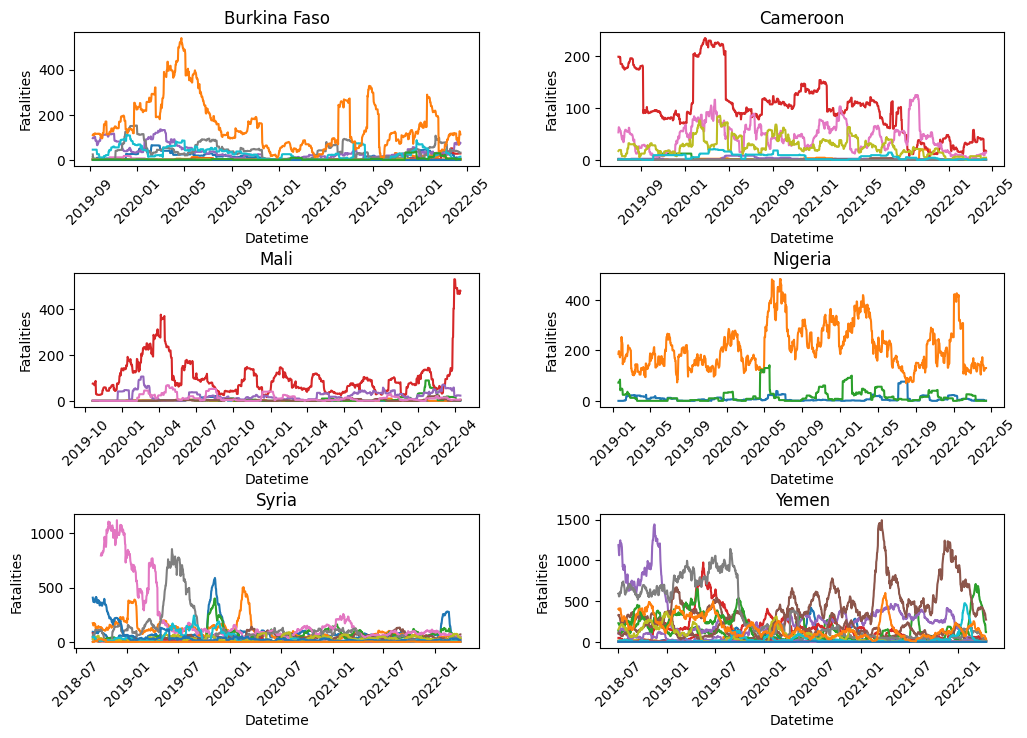

In [43]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 8))
fig.subplots_adjust(hspace = .8, wspace = .3)
axs = axs.ravel()
for i, country in enumerate(df_sum_event_SvyWindow.columns.get_level_values("Country").unique()):
    axs[i].plot(df_sum_event_SvyWindow[country].xs("Fatalities", axis = 1, level = "Indicator", drop_level = False))
    axs[i].set_title(country)
    axs[i].set_xlabel("Datetime")
    axs[i].set_ylabel("Fatalities")
    axs[i].tick_params(axis = "x", labelrotation = 45)
# Remove extra plot.
#axs[-1].set_axis_off()
# Save the figure.
fig.savefig(PATH_TO_SAVE_DATA + "time_series.png", dpi = 300, bbox_inches = "tight")